<a href="https://colab.research.google.com/github/Gss31/Data-Science-Prediction-using-Unsupervised-ML/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1599,) (1599, 11)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


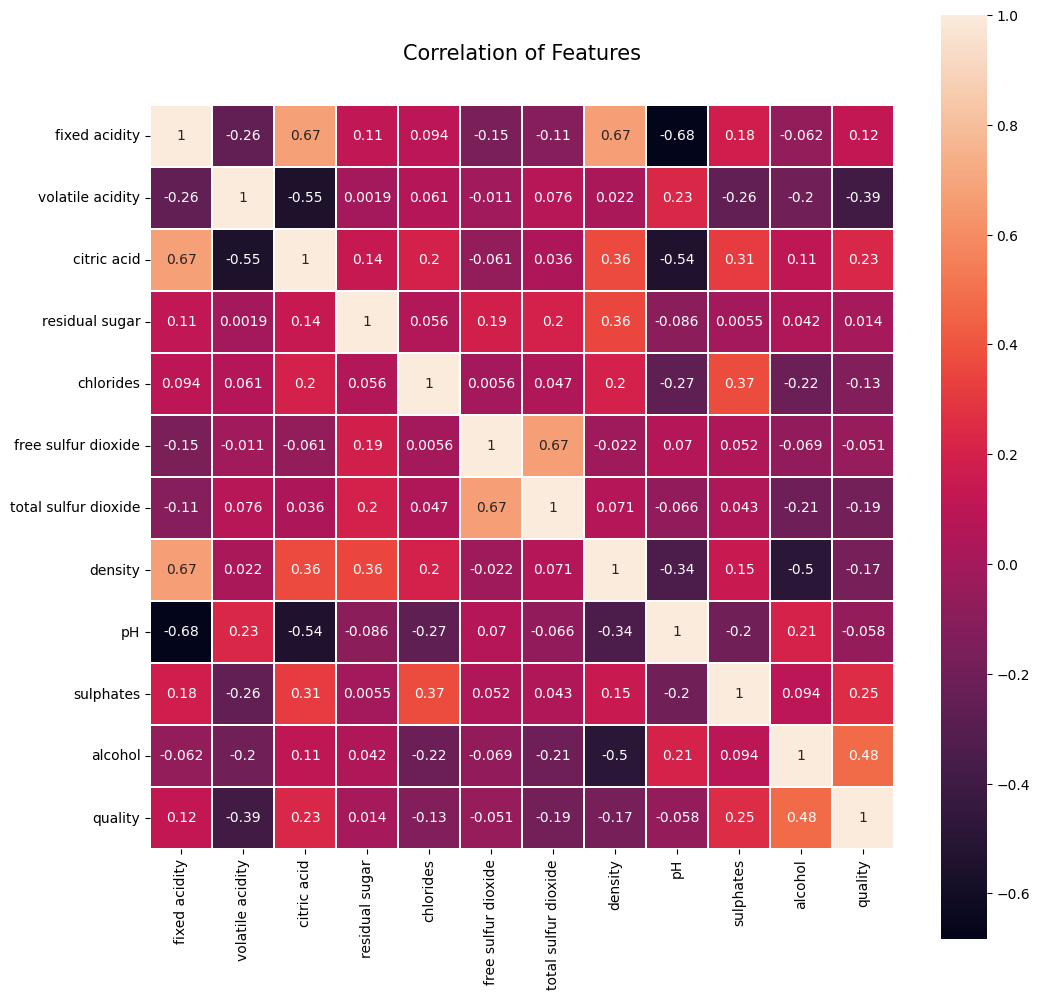

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For this kernel, I amm only using the red wine dataset
data = pd.read_csv('winequality-red.csv')
data.head()

#Summary statistics
data.describe()

#All columns has the same number of data points
extra = data[data.duplicated()]
extra.shape


# Let's proceed to separate 'quality' as the target variable and the rest as features.
y = data.quality                  # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)

#Let's look at the correlation among the variables using Correlation chart
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,
            linecolor='white', annot=True)

#Use Random Forest Classifier to train a prediction model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

#Split data into training and test datasets
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)


#Train and evaluate the Random Forest Classifier with Cross Validation
# Instantiate the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=seed)


# Compute k-fold cross validation on training dataset and see mean accuracy score
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')

#Perform predictions
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)


